# Предсказание стоимости квартир на вторичном рынке в г. Сочи

Данные: Имеется датасет с объявлениями о предложении квартир на вторичном рынке г. Сочи на сайтах avito.ru, sob.ru, cian.ru. Источник данных сайт-парсер https://ads-api.ru/

Временные рамки: данные с 01.06.2023 по 31.05.2024

Задача: предсказать стоимость квартиры на вторичном рынке г.Сочи.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif


from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

### 1. Знакомство с данными, очистка, базовый анализ.

In [66]:
df = pd.read_csv('sochi_flats.csv', sep = ';')

In [67]:
df.head()

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
0,"2-к кв. Краснодарский край, Сочи ул. Тимирязев...",6850000,2023-05-30 23:57:51,89094628623,Вымпел-Коммуникации,недоступно,Частное лицо (фильтр),Краснодарский край,Сочи,Центральный,...,cian.ru,43.629455,39.725694,NaN,Площадь кухни=5.0|Жилая площадь=0|Тип объявлен...,https://www.cian.ru/sale/flat/287680372,https://cdn-p.cian.site/images/65/629/271/kvar...,Краснодарский край,да,неизвестно
1,"Студия Краснодарский край, Сочи Светлана мкр, ...",6250000,2023-05-30 23:57:30,89891984835,Мобильные ТелеСистемы,недоступно,Частное лицо (фильтр),Краснодарский край,Сочи,Хостинский,...,cian.ru,43.582207,39.740714,NaN,Площадь кухни=0|Жилая площадь=0|Тип объявления...,https://www.cian.ru/sale/flat/288061259,https://cdn-p.cian.site/images/kvartira-svetla...,Краснодарский край,да,неизвестно
2,"Квартира-студия, 21.8 м², 1/3 эт.",6900000,2023-05-30 23:55:56,0,не определен,недоступно,Частное лицо,Краснодарский край,Сочи,Адлерский,...,avito.ru,43.484794,39.894631,NaN,Тип объявления=Продам|Количество комнат=Студия...,https://www.avito.ru/sochi/kvartiry/kvartira-s...,https://90.img.avito.st/image/1/1.rx2Lgba6A_S9...,не определен,да,неизвестно
3,"2-к. квартира, 42 м², 2/5 эт.",5100000,2023-05-30 23:55:19,0,не определен,недоступно,Частное лицо,Краснодарский край,Сочи,Адлерский,...,avito.ru,43.438172,39.911178,NaN,Площадь кухни=8|Жилая площадь=29|Тип объявлени...,https://www.avito.ru/sochi/kvartiry/2-k._kvart...,https://90.img.avito.st/image/1/1.szLKj7a5H9v8...,не определен,да,неизвестно
4,"3-к. квартира, 68.8 м², 1/5 эт.",14000000,2023-05-30 23:55:05,0,не определен,недоступно,Частное лицо,Краснодарский край,Сочи,Центральный,...,avito.ru,43.607368,39.724892,NaN,Площадь кухни=16|Тип объявления=Продам|Количес...,https://www.avito.ru/sochi/kvartiry/3-k._kvart...,https://10.img.avito.st/image/1/1.awoDCLa6x-M1...,не определен,да,неизвестно


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34233 entries, 0 to 34232
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Название                            34233 non-null  object 
 1   Цена                                34233 non-null  int64  
 2   Дата                                34233 non-null  object 
 3   Телефон                             34233 non-null  int64  
 4   Оператор                            34233 non-null  object 
 5   Контактное лицо (автор объявления)  34233 non-null  object 
 6   Тип автора                          34233 non-null  object 
 7   Регион                              34233 non-null  object 
 8   Город                               34233 non-null  object 
 9   Метро/Район                         33293 non-null  object 
 10  Адрес                               34189 non-null  object 
 11  Описание                            34233

In [69]:
df.describe(include='object')

,Название,Дата,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,Адрес,Описание,Тип объявления,Категория1,Категория2,Источник,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
count,34233,34233,34233,34233,34233,34233,34233,33293,34189,34233,34233,34233,34233,34233,34207,34210,33374,34233,34233,34233
unique,23629,33728,11,1,2,1,2,4,7475,33332,1,1,1,2,31034,34210,33374,82,2,1
top,"1-к. квартира, 30 м², 2/5 эт.",2022-12-11 21:51:55,Мобильные ТелеСистемы,недоступно,Частное лицо (фильтр),Краснодарский край,Сочи,Центральный,Сочи,Уникальное предложение в уникальном комплексе!...,Продам,Недвижимость,Квартиры,avito.ru,Тип объявления=Продам|Количество комнат=Студия...,https://www.cian.ru/sale/flat/287680372,https://cdn-p.cian.site/images/65/629/271/kvar...,Краснодарский край,да,неизвестно
freq,49,5,22743,34233,30316,34233,33438,12184,4870,11,34233,34233,34233,28753,21,1,1,23567,30558,34233


Удалим неинформативные колонки.

In [70]:
drop_columns = ['Телефон', 'Оператор', 'Контактное лицо (автор объявления)', 
                'Тип автора', 'Регион', 'Город', 'Тип объявления', 'ID на сайте', 
                'Источник', 'Персона для контактов', 'URL', 'Ссылки на картинки', 
                'Регион мобильного телефона', 'Номер подменён', 'Расстояние до метро, км', 
                'Категория1', 'Категория2']

df = df.drop(drop_columns, axis=1)

In [71]:
df.head()

,Название,Цена,Дата,Метро/Район,Адрес,Описание,lat,lng,Доп.параметры
0,"2-к кв. Краснодарский край, Сочи ул. Тимирязев...",6850000,2023-05-30 23:57:51,Центральный,"ул. Тимирязева, 38В",СРОЧНАЯ ПРОДАЖА. Собственник.Торга НЕТ. Продаю...,43.629455,39.725694,Площадь кухни=5.0|Жилая площадь=0|Тип объявлен...
1,"Студия Краснодарский край, Сочи Светлана мкр, ...",6250000,2023-05-30 23:57:30,Хостинский,"Светлана мкр, ул. Лысая Гора, 27/18",Продам квартиру-студию 25кв.м в центре Сочи на...,43.582207,39.740714,Площадь кухни=0|Жилая площадь=0|Тип объявления...
2,"Квартира-студия, 21.8 м², 1/3 эт.",6900000,2023-05-30 23:55:56,Адлерский,"ул. Ленина, 298В/1",Продаю студию в ЖК Касабланка!!!!!! СОБСТВЕННИ...,43.484794,39.894631,Тип объявления=Продам|Количество комнат=Студия...
3,"2-к. квартира, 42 м², 2/5 эт.",5100000,2023-05-30 23:55:19,Адлерский,жилой район Адлер,"В продаже 2к.квартира, окна на две стороны, ле...",43.438172,39.911178,Площадь кухни=8|Жилая площадь=29|Тип объявлени...
4,"3-к. квартира, 68.8 м², 1/5 эт.",14000000,2023-05-30 23:55:05,Центральный,"микрорайон Заречный, Рабочий пер., 35",Срочно продается просторная трехкомнатная квар...,43.607368,39.724892,Площадь кухни=16|Тип объявления=Продам|Количес...


Посмотрим данные на наличие дубликатов и пропусков.

In [72]:
df.isnull().sum()

Название           0
Цена               0
Дата               0
Метро/Район      940
Адрес             44
Описание           0
lat                0
lng                0
Доп.параметры     26
dtype: int64

Посмотрим на пример графы "Доп.параметры".

In [73]:
df['Доп.параметры'][378]

'Площадь кухни=10|Жилая площадь=20|Тип объявления=Продам|Количество комнат=1|Вид объекта=Вторичка|Этаж=6|Этажей в доме=11|Площадь=46'

Поскольку столбец "Доп.параметры" содержит важные для оценки стоимости сведения, удалим все строки с пустым содержанием этого столбца.

In [74]:
df = df.dropna(subset=['Доп.параметры'])


In [75]:
df = df.drop_duplicates()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34203 entries, 0 to 34232
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Название       34203 non-null  object 
 1   Цена           34203 non-null  int64  
 2   Дата           34203 non-null  object 
 3   Метро/Район    33268 non-null  object 
 4   Адрес          34164 non-null  object 
 5   Описание       34203 non-null  object 
 6   lat            34203 non-null  float64
 7   lng            34203 non-null  float64
 8   Доп.параметры  34203 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.6+ MB


Проверим разброс цен на квартиры в датасете

In [77]:
df['Цена'].describe()

count    3.420300e+04
mean     1.263101e+07
std      2.774897e+07
min      0.000000e+00
25%      6.800000e+06
50%      9.800000e+06
75%      1.430000e+07
max      4.499000e+09
Name: Цена, dtype: float64

Медианная цена на квартиры 12,6 млн. руб., минимальная - 0, максимальная 449 млн. руб.
Мы не будем рассматривать квартиры со стоимостью ниже 100 тыс.руб. и больше 50 млн.руб.

In [78]:
df_cleaned = df[df['Цена'] < 50000000]
df_cleaned = df_cleaned[df_cleaned['Цена'] > 100000]

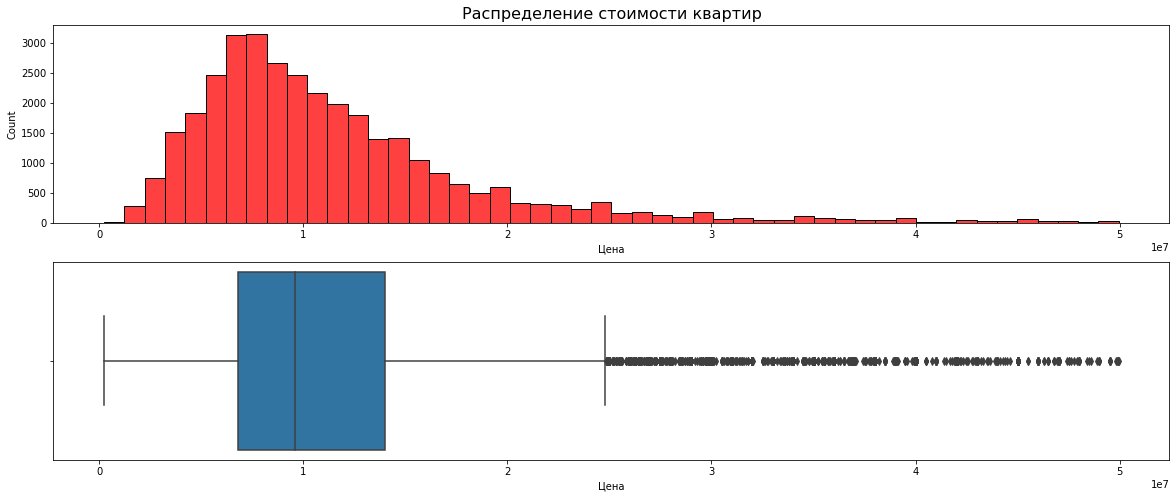

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
axes[0].set_title('Распределение стоимости квартир', fontsize=16)
sns.histplot(
    data=df_cleaned,
    x='Цена',
    bins=50,
    color='red',
    ax=axes[0]
);
sns.boxplot(
    data=df_cleaned,
    x='Цена',
    orient='h',
    width=0.9  
);

Посмотрим на координаты объектов

<AxesSubplot:xlabel='lat', ylabel='lng'>

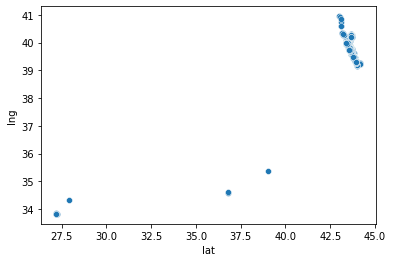

In [80]:
sns.scatterplot(df_cleaned.lat, df_cleaned.lng)

Явно присутствуют выбросы. Удалим объекты с lng < 38

In [81]:
df_cleaned = df_cleaned[df_cleaned['lng'] > 38]

<AxesSubplot:xlabel='lat', ylabel='lng'>

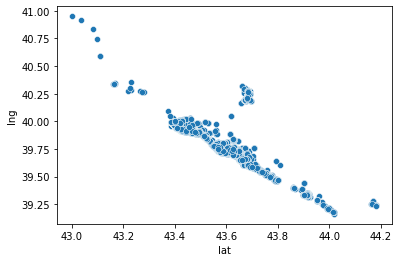

In [82]:
sns.scatterplot(df_cleaned.lat, df_cleaned.lng)

Теперь размещение объектов соответствует визуально границам города Сочи.

Поскольку все объекты имеют географические координаты, удалим столбцы, содержащие информацию об адресе и метро/район как малоинформативные.
Также удалим дату, поскольку данные только за один год, а рынок недвижимости достаточно ригидный, и название, поскольку вся описательная информация содержится в столбце "Доп.Информация".

In [83]:
df_cleaned = df_cleaned.drop(['Метро/Район', 'Адрес', 'Дата', 'Название'], axis=1)

In [84]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33666 entries, 0 to 34231
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Цена           33666 non-null  int64  
 1   Описание       33666 non-null  object 
 2   lat            33666 non-null  float64
 3   lng            33666 non-null  float64
 4   Доп.параметры  33666 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


### 2. Разведывательный анализ EDA и feature engineering.

Посмотрим на содержимое ячейки "Доп.параметры" и извлечем оттуда информацию для дополнительных признаков

In [85]:
df_cleaned['Доп.параметры'][1]

'Площадь кухни=0|Жилая площадь=0|Тип объявления=Продам|Количество комнат=Студия|Вид объекта=Вторичка|Этаж=4|Этажей в доме=4|Площадь=25.0'

In [86]:
import re

def string_parser (string, word_to_find):
    output = re.findall(word_to_find, string)
    try:
        return int(output[0])
    except:
        IndexError
        return 0

In [87]:
df_cleaned['Площадь'] = df_cleaned['Доп.параметры'].apply(string_parser, word_to_find='Площадь=(\d+)')
df_cleaned['Этажей в доме'] = df_cleaned['Доп.параметры'].apply(string_parser, word_to_find='Этажей в доме=(\d+)')
df_cleaned['Этаж'] = df_cleaned['Доп.параметры'].apply(string_parser, word_to_find='Этаж=(\d+)')
df_cleaned['Количество комнат'] = df_cleaned['Доп.параметры'].apply(string_parser, word_to_find='Количество комнат=(\d+)')
df_cleaned

,Цена,Описание,lat,lng,Доп.параметры,Площадь,Этажей в доме,Этаж,Количество комнат
0,6850000,СРОЧНАЯ ПРОДАЖА. Собственник.Торга НЕТ. Продаю...,43.629455,39.725694,Площадь кухни=5.0|Жилая площадь=0|Тип объявлен...,40,4,1,2
1,6250000,Продам квартиру-студию 25кв.м в центре Сочи на...,43.582207,39.740714,Площадь кухни=0|Жилая площадь=0|Тип объявления...,25,4,4,0
2,6900000,Продаю студию в ЖК Касабланка!!!!!! СОБСТВЕННИ...,43.484794,39.894631,Тип объявления=Продам|Количество комнат=Студия...,21,3,1,0
3,5100000,"В продаже 2к.квартира, окна на две стороны, ле...",43.438172,39.911178,Площадь кухни=8|Жилая площадь=29|Тип объявлени...,42,5,2,2
4,14000000,Срочно продается просторная трехкомнатная квар...,43.607368,39.724892,Площадь кухни=16|Тип объявления=Продам|Количес...,68,5,1,3
...,...,...,...,...,...,...,...,...,...
34227,9000000,Собственник Угловая 3 окна Хороший ремонт Прям...,43.567395,39.764555,Площадь кухни=0|Жилая площадь=0|Тип объявления...,36,5,1,1
34228,8600000,Я СОБСТВЕННИК! Продаю евро-двушку (отдельно сп...,43.625794,39.747038,Площадь кухни=3.0|Жилая площадь=37.0|Тип объяв...,42,3,3,2
34229,2900000,Угловая с двумя окнами .все фото свежие и прод...,43.567330,39.750550,Площадь кухни=0|Жилая площадь=0|Тип объявления...,23,3,2,1
34230,22000000,"Я собственник, просьба звонить только по делу....",43.453612,39.949599,Площадь кухни=6|Жилая площадь=20|Тип объявлени...,48,3,3,2


In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33666 entries, 0 to 34231
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена               33666 non-null  int64  
 1   Описание           33666 non-null  object 
 2   lat                33666 non-null  float64
 3   lng                33666 non-null  float64
 4   Доп.параметры      33666 non-null  object 
 5   Площадь            33666 non-null  int64  
 6   Этажей в доме      33666 non-null  int64  
 7   Этаж               33666 non-null  int64  
 8   Количество комнат  33666 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.6+ MB


Очевидно, что сравнивать квартиры по стоимости надо на основании цены за квадратный метр. Введем признак "Цена за ед". 


In [89]:
df_cleaned['Цена за ед.'] = round(df_cleaned['Цена'] / df_cleaned['Площадь'])

In [90]:
df_cleaned = df_cleaned.drop(['Цена', 'Описание', 'Доп.параметры'], axis=1)

Разделим город на кластеры по средней стоимости недвижимости.

<AxesSubplot:xlabel='lat', ylabel='lng'>

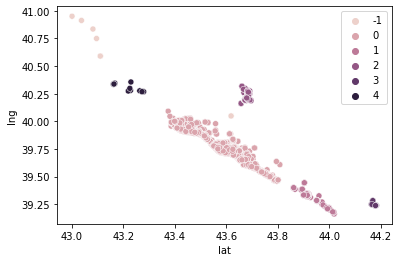

In [91]:
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.07, min_samples=4).fit(df_cleaned[['lat', 'lng']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df_cleaned.lat, y=df_cleaned.lng, c=clustering.labels_, hue=clustering.labels_)

In [92]:
df_cleaned['cluster'] = clustering.labels_

In [93]:
df_cleaned['cluster'].value_counts()

 0    31876
 1      943
 2      802
 3       21
 4       16
-1        8
Name: cluster, dtype: int64

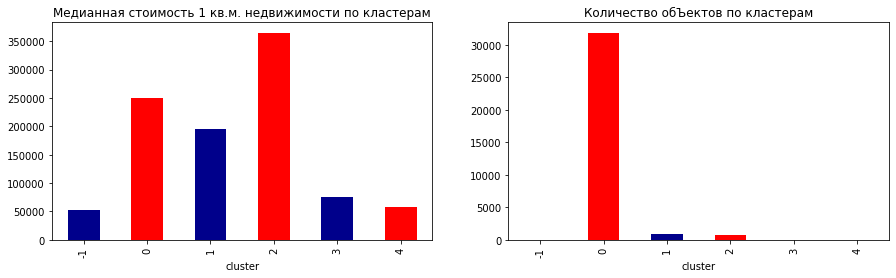

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_cleaned.groupby(['cluster'])['Цена за ед.'].median().plot(
    ax=axes[0],
    kind='bar', 
    title= ('Медианная стоимость 1 кв.м. недвижимости по кластерам'),
    color=('darkblue', 'red'),
    );
df_cleaned.groupby(['cluster'])['Цена за ед.'].count().plot(
    ax=axes[1],
    kind='bar', 
    title= ('Количество обЪектов по кластерам'),
    color=('darkblue', 'red'),
    );

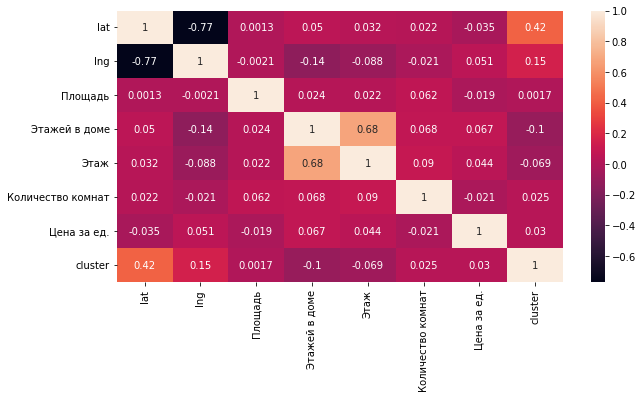

In [95]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_cleaned.corr(), annot = True);

#### Стоимость недвижимоси зависит от нахождения в кластере?

Нулевая гипотеза: стоимость кв.м. недвижимости не зависит от нахождения в определенном кластере.

Альтернативная гипотеза: зависимость есть.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [96]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [97]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

In [98]:
cluster_0 = df_cleaned.loc[df_cleaned['cluster'] == 0 , 'Цена за ед.']
cluster_1 = df_cleaned.loc[df_cleaned['cluster'] == 1 , 'Цена за ед.']
cluster_2 = df_cleaned.loc[df_cleaned['cluster'] == 2 , 'Цена за ед.']
cluster_3 = df_cleaned.loc[df_cleaned['cluster'] == 3 , 'Цена за ед.']
cluster_4 = df_cleaned.loc[df_cleaned['cluster'] == 4 , 'Цена за ед.']

# проводим тест Шапиро-Уилка
print('Для кластера 0:')
result = stats.shapiro(cluster_0)
decision_normality(result[1])

print('Для кластера 1:')
result = stats.shapiro(cluster_1)
decision_normality(result[1])

print('Для кластера 2:')
result = stats.shapiro(cluster_2)
decision_normality(result[1])

print('Для кластера 3:')
result = stats.shapiro(cluster_3)
decision_normality(result[1])

print('Для кластера 4:')
result = stats.shapiro(cluster_4)
decision_normality(result[1])

Для кластера 0:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для кластера 1:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для кластера 2:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для кластера 3:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для кластера 4:
p-value = 0.081
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [99]:
_, p = stats.kruskal(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


### 3. Отбор и кодирование признаков

In [100]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop='first')# Получаем закодированные имена столбцов
columns_to_change = ['Этажей в доме', 'Этаж', 'Количество комнат', 'cluster']

data_onehot = one_hot_encoder.fit_transform(df_cleaned[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

In [102]:
train_data = pd.concat(
    [df_cleaned.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (33666, 74)


Cформируем матрицу наблюдений X, вектор целевой переменной y

In [103]:
X = train_data.drop(['Цена за ед.'], axis=1)
y = train_data['Цена за ед.']

Разобьем выборку на обучающую и валидационную в соотношении 80/20:

In [105]:
from sklearn import model_selection
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42
)

Выберем признаки, которые имеют влияние на предсказание целевой переменной.

In [109]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k='all')
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

features_to_use = list(selector.get_feature_names_out())
features_to_use

for n in X_train.columns:
    if n not in features_to_use:
        X_train = X_train.drop(columns=n)
        X_valid = X_valid.drop(columns=n)
        
X_train.columns


Index(['lat', 'lng', 'Площадь', 'Этажей в доме_2', 'Этажей в доме_3',
       'Этажей в доме_4', 'Этажей в доме_9', 'Этажей в доме_13',
       'Этажей в доме_14', 'Этажей в доме_15', 'Этажей в доме_17',
       'Этажей в доме_19', 'Этажей в доме_21', 'Этажей в доме_23',
       'Этажей в доме_24', 'Этажей в доме_30', 'Этаж_2', 'Этаж_4', 'Этаж_13',
       'Этаж_14', 'Этаж_18', 'Количество комнат_3', 'Количество комнат_5',
       'cluster_1', 'cluster_2'],
      dtype='object')

Нормализуем предикторы.

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = ['lat', 'lng', 'Площадь']
 
x = X_train[col_names]
scaler.fit(x.values)
X_train[col_names] = scaler.transform(X_train[col_names].values)
X_valid[col_names] = scaler.transform(X_valid[col_names].values)

### 4. Решение задачи регрессии

In [113]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_valid_predict = lr_model.predict(X_valid)
 
print("Train MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))))
print("Valid MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))))

Train MSE: 366592.594
Valid MSE: 491742.378


In [114]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_valid_poly = poly.transform(X_valid)
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_valid_predict_poly = lr_model_poly.predict(X_valid_poly)

print("Train MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_poly))))
print("Valid MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict_poly))))

Train MSE: 334602.183
Valid MSE: 484634.210


In [115]:
#Создаём объект класса DecisionTreeClassifier
dt_reg_2d = tree.DecisionTreeRegressor(random_state=42, max_depth=11)
#Обучаем дерево решений по алгоритму CART
dt_reg_2d.fit(X_train, y_train)

#Делаем предсказание для тренировочной выборки
y_train_predict = dt_reg_2d.predict(X_train)
#Делаем предсказание для тестовой выборки
y_valid_predict = dt_reg_2d.predict(X_valid)
 
print("Train MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))))
print("Valid MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))))

Train MSE: 103541.268
Valid MSE: 283608.716


In [117]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':list(range(7, 20, 1))
              }
grid_search = GridSearchCV(
    tree.DecisionTreeRegressor(random_state=42),
    param_grid=param_grid 
)  
%time grid_search.fit(X_train, y_train) 
y_train_pred = grid_search.predict(X_train)
y_valid_pred = grid_search.predict(X_valid)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print("Train MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))))
print("Valid MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))))

CPU times: total: 4.27 s
Wall time: 4.35 s
Наилучшие значения гиперпараметров: {'max_depth': 7}
Train MSE: 103541.268
Valid MSE: 283608.716


In [134]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features_to_use)
dvalid = xgb.DMatrix(X_valid, label=y_valid, feature_names=features_to_use)

xgb_pars = {'min_child_weight': 1, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 5, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
modelXGB = xgb.train(
    params=xgb_pars, 
    dtrain=dtrain, 
    num_boost_round=400, 
    evals=watchlist, 
    early_stopping_rounds=40,
    maximize=False, 
    verbose_eval=10 
)

[0]	train-rmse:347803.95120	valid-rmse:468174.62779
[10]	train-rmse:208806.32201	valid-rmse:326630.84216
[20]	train-rmse:165831.32374	valid-rmse:278574.95928
[30]	train-rmse:146372.11687	valid-rmse:261490.57179
[40]	train-rmse:135458.18294	valid-rmse:255929.86572
[50]	train-rmse:127063.30428	valid-rmse:251760.14123
[60]	train-rmse:121520.18680	valid-rmse:249379.76043
[70]	train-rmse:116500.54242	valid-rmse:247701.58658
[80]	train-rmse:113005.05216	valid-rmse:247409.48557
[90]	train-rmse:109710.17207	valid-rmse:246484.88610
[100]	train-rmse:107050.35364	valid-rmse:246569.22451
[110]	train-rmse:104624.30694	valid-rmse:246162.21663
[120]	train-rmse:102499.20583	valid-rmse:246157.76645
[130]	train-rmse:100977.40379	valid-rmse:246391.25359
[140]	train-rmse:99557.58050	valid-rmse:247272.98596
[150]	train-rmse:98135.88117	valid-rmse:247867.43615
[157]	train-rmse:97425.20491	valid-rmse:248282.84295


In [137]:
rf_rgr = ensemble.RandomForestRegressor(
    n_estimators=500, 
    criterion='squared_error', 
    max_depth=8, 
    max_features='sqrt',
    random_state=42, 
    min_samples_leaf=10
)

rf_rgr.fit(X_train, y_train)

#Делаем предсказание для тренировочной выборки
y_train_predict = rf_rgr.predict(X_train)
#Делаем предсказание для тестовой выборки
y_valid_predict = rf_rgr.predict(X_valid)
 
print("Train MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))))
print("Valid MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))))


Train MSE: 223286.445
Valid MSE: 326273.390


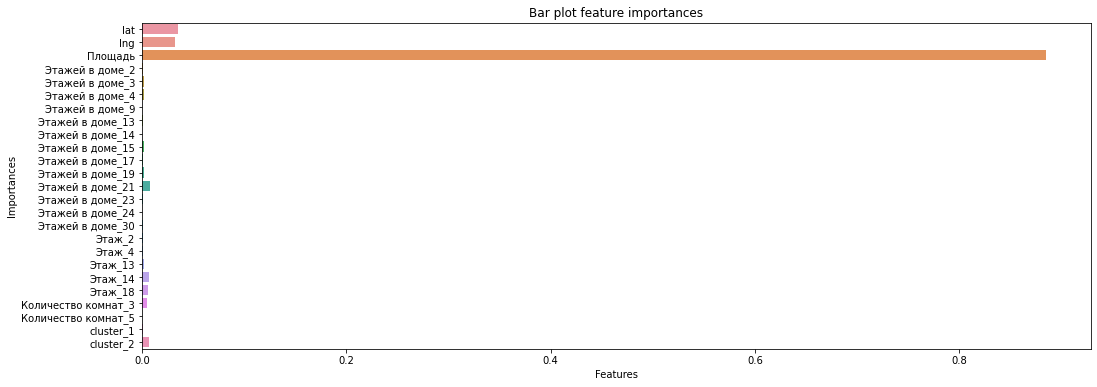

In [143]:
fig, ax = plt.subplots(figsize=(17, 6)) #фигура + координатная плоскость
feature = X_train.columns #признаки
feature_importances = rf_rgr.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(y=feature, x=feature_importances);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Наиболее важными параметрами, влияющими на стоимость квадратного метра недвижимости, является ее расположение, площадь квартиры, высотность дома и высокий этаж, что может указывать на то, что это новый дом.

Наименьшее значение метрики MSE было получено при использовании модели машинного обучения XGBoost.

# 5. Тестирование
Выгрузим из базы свежие объявления 
с 01.06.24 по 08.06.24 для тестовой выборки

Протестируем модель оценки стоимости квартир в г.Сочи на лучшей модели XGBoost.

In [383]:
# напишем функцию для корректной кластеризации тестовых объявлений

cluster_def = df_cleaned.groupby('cluster')['lat', 'lng'].agg(['min', 'max'])
cluster_def.columns = cluster_def.columns.to_flat_index()
cluster_def['cluster'] = cluster_def.index
cluster_def.reset_index(drop=True)

In [387]:
def clusterisation(lat_n, lng_n):
    
    for n in range (len(cluster_def)-1):
        if cluster_def[('lat', 'min')][n] < lat_n < cluster_def[('lat', 'max')][n] and cluster_def[('lng', 'min')][n] < lng_n < cluster_def[('lng', 'max')][n]:
            cluster_n = cluster_def['cluster'][n]
            return cluster_n
        
        else:
            cluster_n = -1
    
            return cluster_n

In [429]:
df_test = pd.read_csv('sochi_flats_test.csv', sep = ';')

In [432]:
df_test = df_test.drop(drop_columns, axis=1)
df_test = df_test.dropna(subset=['Доп.параметры'])
df_test = df_test.drop_duplicates()
df_test = df_test[df_test['Цена'] < 50000000]
df_test = df_test[df_test['Цена'] > 1000000]
df_test = df_test.drop(['Метро/Район', 'Адрес', 'Дата', 'Название'], axis=1)

In [433]:
df_test['Площадь'] = df_test['Доп.параметры'].apply(string_parser, word_to_find='Площадь=(\d+)')
df_test['Этажей в доме'] = df_test['Доп.параметры'].apply(string_parser, word_to_find='Этажей в доме=(\d+)')
df_test['Этаж'] = df_test['Доп.параметры'].apply(string_parser, word_to_find='Этаж=(\d+)')
df_test['Количество комнат'] = df_test['Доп.параметры'].apply(string_parser, word_to_find='Количество комнат=(\d+)')
df_test = df_test[df_test['Площадь'] > 0]

In [434]:
df_test['Цена за ед.'] = round(df_test['Цена'] / df_test['Площадь'])
df_test = df_test.drop(['Цена', 'Описание', 'Доп.параметры'], axis=1)

In [435]:
df_test['cluster'] = df_test.apply(lambda x: clusterisation(x.lat, x.lng), axis=1)

In [436]:
data_onehot_test = one_hot_encoder.fit_transform(df_test[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot_test = pd.DataFrame(data_onehot_test, columns=column_names)
test_data = pd.concat(
    [df_test.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot_test], 
    axis=1
)


In [437]:
X_test = test_data.drop(['Цена за ед.'], axis=1)
y_test = test_data['Цена за ед.']

In [438]:
for n in X_test.columns:
    if n not in features_to_use:
        X_test = X_test.drop(columns=n)
               
X_test.columns

Index(['lat', 'lng', 'Площадь', 'Этажей в доме_2', 'Этажей в доме_3',
       'Этажей в доме_4', 'Этажей в доме_9', 'Этажей в доме_13',
       'Этажей в доме_14', 'Этажей в доме_15', 'Этажей в доме_17',
       'Этажей в доме_19', 'Этажей в доме_21', 'Этажей в доме_23',
       'Этажей в доме_24', 'Этаж_2', 'Этаж_4', 'Этаж_13', 'Этаж_14',
       'Количество комнат_3', 'Количество комнат_5'],
      dtype='object')

In [439]:
for n in features_to_use:
    if n not in X_test.columns:
        X_test[n] = 0
               
X_test.columns

Index(['lat', 'lng', 'Площадь', 'Этажей в доме_2', 'Этажей в доме_3',
       'Этажей в доме_4', 'Этажей в доме_9', 'Этажей в доме_13',
       'Этажей в доме_14', 'Этажей в доме_15', 'Этажей в доме_17',
       'Этажей в доме_19', 'Этажей в доме_21', 'Этажей в доме_23',
       'Этажей в доме_24', 'Этаж_2', 'Этаж_4', 'Этаж_13', 'Этаж_14',
       'Количество комнат_3', 'Количество комнат_5', 'Этажей в доме_30',
       'Этаж_18', 'cluster_1', 'cluster_2'],
      dtype='object')

In [440]:
X_test[col_names] = scaler.transform(X_test[col_names].values)

In [441]:
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features_to_use)
y_test_predict = modelXGB.predict(dtest)

print("Test MSE: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))))

Test MSE: 191982.158


Значение метрики MSE = 191982.158 на новых данных.